In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
import ternary
import imageio


In [2]:
absolute_path = "C:/Users/maler/Google Drive/Lavoro/Zuse Institute/Code/experiments_results"
experiment_folder = absolute_path + "/base"
experiment_run_folder = experiment_folder + '/1'

In [3]:
metrics_results = utils.load_metrics(experiment_run_folder)

In [4]:
agent_metric = metrics_results['AgentMetric']
n_agents = agent_metric.shape[1]
n_options = agent_metric.shape[2]
R = np.max(np.abs(agent_metric))

In [5]:
mapped_options = agent_metric/(n_options*R) + 1/n_options

# This is used to linearize the plots by sampling on every x time_steps
x = 100
mapped_options = mapped_options[::x, :, :]

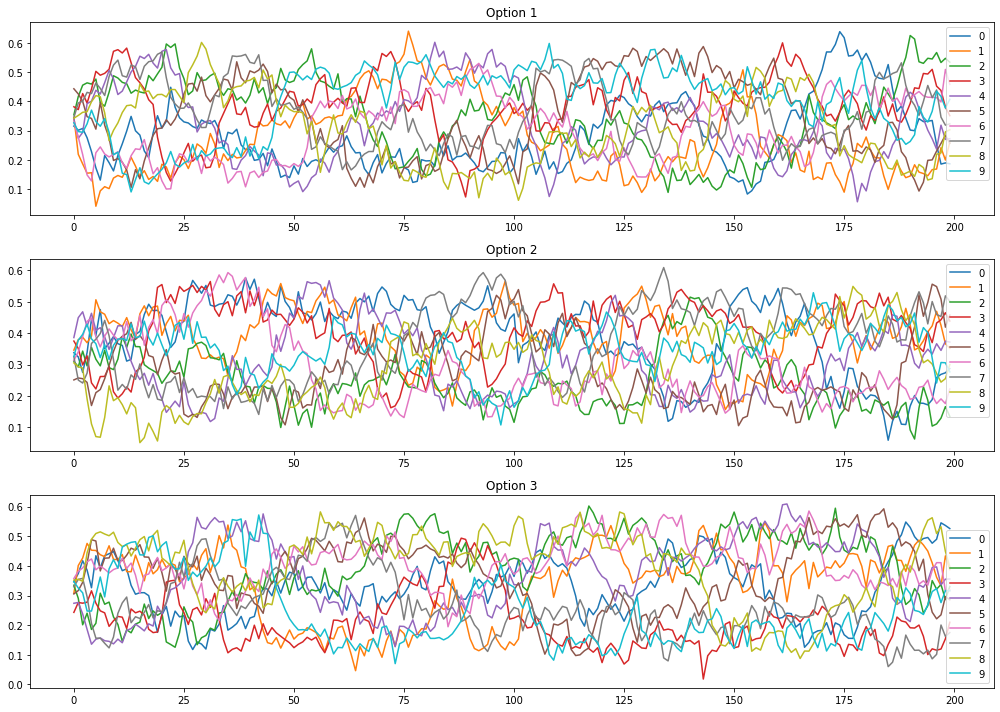

In [6]:
plt.figure(figsize=(14, 10))
for agent in range(n_agents):
    for option in range(n_options):
        plt.subplot(3, 1, option+1)
        plt.plot(mapped_options[:, agent, option], label=str(agent))

plt.subplot(3, 1, 1)
plt.title('Option 1')
plt.legend()
plt.subplot(3, 1, 2)
plt.title('Option 2')
plt.legend()
plt.subplot(3, 1, 3)
plt.title('Option 3')
plt.legend()
plt.tight_layout()
plt.show()

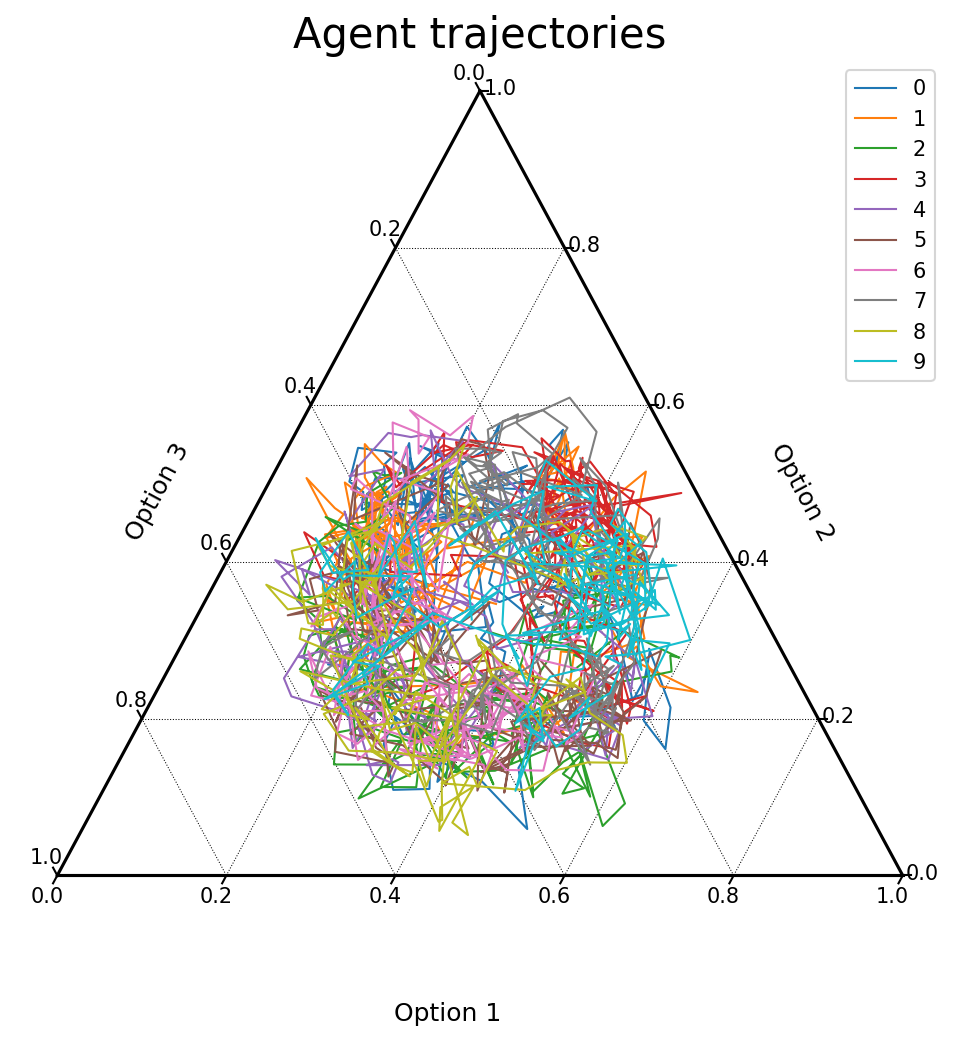

In [7]:
utils.plot_agents(mapped_options)

In [10]:
save_path = "C:/Users/maler/Federico/Lavoro/ZIB/plots/"

filenames = []
for i in range(10, mapped_options.shape[0]- 10):
    filename = f'{savepath}{i}.png'
    filenames.append(filename)

    to_plot = mapped_options[i:i+10]
    
    utils.plot_agents(to_plot, filename)

# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

In [12]:
int((mapped_options.shape[0])/10 - 10)
mapped_options.shape

(200, 10, 3)